In [2]:
import pandas as pd

train_url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/train.csv"
train = pd.read_csv(train_url)



In [3]:
train.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0809,31,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N63A1,Yes,11/24/08,40.9,16.6,187.0,3200.0,FEMALE,9.08458,-24.54903,NaN
1,PAL0809,41,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N74A1,Yes,11/24/08,49.0,19.5,210.0,3950.0,MALE,9.53262,-24.66867,NaN
2,PAL0708,4,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N32A2,Yes,11/27/07,50.0,15.2,218.0,5700.0,MALE,8.25540,-25.40075,NaN
3,PAL0708,15,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A1,Yes,12/3/07,45.8,14.6,210.0,4200.0,FEMALE,7.79958,-25.62618,NaN
4,PAL0809,34,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N65A2,Yes,11/24/08,51.0,18.8,203.0,4100.0,MALE,9.23196,-24.17282,NaN


In [4]:
#Data preparation copied from assignment
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train["Species"])

def prepare_data(df):
  df = df.drop(["studyName", "Sample Number", "Individual ID", "Date Egg", "Comments", "Region"], axis = 1)
  df = df[df["Sex"] != "."]
  df = df.dropna()
  y = le.transform(df["Species"])
  df = df.drop(["Species"], axis = 1)
  df = pd.get_dummies(df)
  return df, y

X_train, y_train = prepare_data(train)

In [5]:
# important import statements to help visualize the data
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Setting up data evualtions
def evaluate_features(features, X, y):
    clf = RandomForestClassifier()  
    scores = cross_val_score(clf, X[features], y, cv=5, scoring='accuracy')
    return np.mean(scores)

Setting up cross valadation score, establishing my classifier as a random object with no paramenters. CV is the amount of time we cross-validate and then return our mean scores 

In [7]:
# Combination copied from assignemnt
from itertools import combinations

# these are not actually all the columns: you'll 
# need to add any of the other ones you want to search for
all_qual_cols = ["Clutch Completion", "Sex"]
all_quant_cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)']

for qual in all_qual_cols: 
  qual_cols = [col for col in X_train.columns if qual in col ]
  for pair in combinations(all_quant_cols, 2):
    cols = qual_cols + list(pair) 
    print(cols)
    # you could train models and score them here, keeping the list of 
    # columns for the model that has the best score. 

['Clutch Completion_No', 'Clutch Completion_Yes', 'Culmen Length (mm)', 'Culmen Depth (mm)']
['Clutch Completion_No', 'Clutch Completion_Yes', 'Culmen Length (mm)', 'Flipper Length (mm)']
['Clutch Completion_No', 'Clutch Completion_Yes', 'Culmen Depth (mm)', 'Flipper Length (mm)']
['Sex_FEMALE', 'Sex_MALE', 'Culmen Length (mm)', 'Culmen Depth (mm)']
['Sex_FEMALE', 'Sex_MALE', 'Culmen Length (mm)', 'Flipper Length (mm)']
['Sex_FEMALE', 'Sex_MALE', 'Culmen Depth (mm)', 'Flipper Length (mm)']


"cols" was just for visualizing how to combine column, the training and test columns will be run on the variable "predicted colmns which includes the columns we haven't dropped, culmen length and culmen depth. Cols above is compare all the data points across species inorder to produce the pair plot below

/Users/lenoxherman/anaconda3/envs/ml-0451/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lenoxherman/anaconda3/envs/ml-0451/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lenoxherman/anaconda3/envs/ml-0451/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lenoxherman/anaconda3/envs/ml-0451/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as

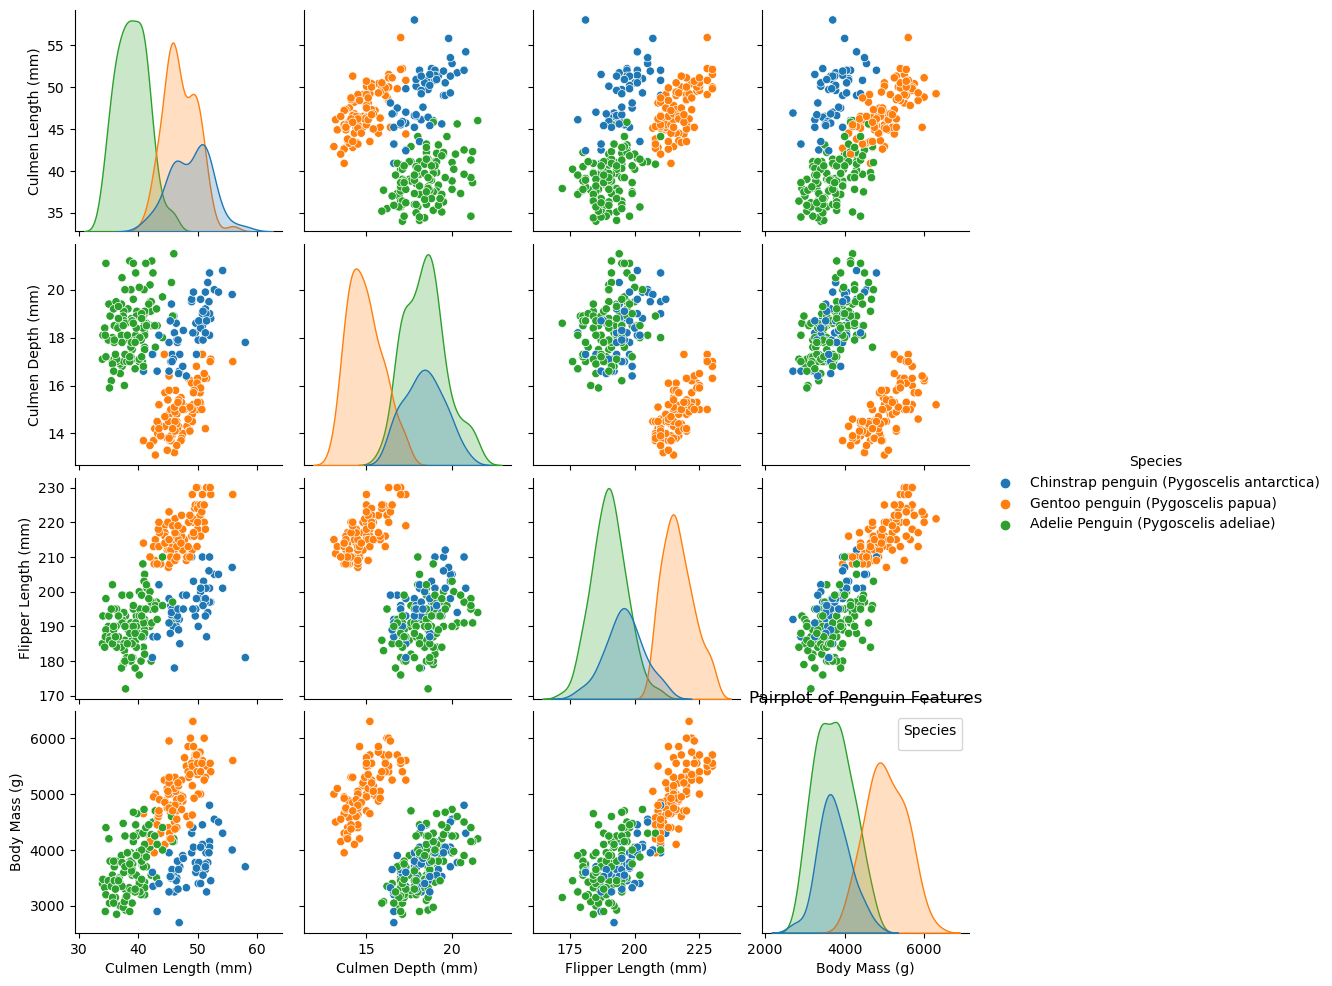

In [8]:
# Combine quantitative features with the target variable for visualization
penguins_explore = train[['Species', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']]

# Plot pairplot
sns.pairplot(penguins_explore, hue='Species')
plt.title('Pairplot of Penguin Features')

plt.xlabel('Feature Values')  # X-axis label
plt.ylabel('Feature Values')  # Y-axis label
plt.legend(title='Species')  # Legend title
plt.show()

Seaborn's pairplot feature shows us different features across different penguin species. It is a good tool to explore relationships between multiple variables and to visualize the data to make comparisons so we can see what characteristics contribute to distunguishing between species.  In this case, the pairplot is applied to the penguins_explore dataframe, which includes the species of penguins and quantitative features such as culmen length, culmen depth, flipper length, and body mass.

Each scatterplot in the grid represents the relationship between two quantitative variables, with each point representing a penguin. The histograms along the diagonal show the distribution of each individual variable. The different colors in the graph represent the different species of penguin. 


/Users/lenoxherman/anaconda3/envs/ml-0451/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lenoxherman/anaconda3/envs/ml-0451/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


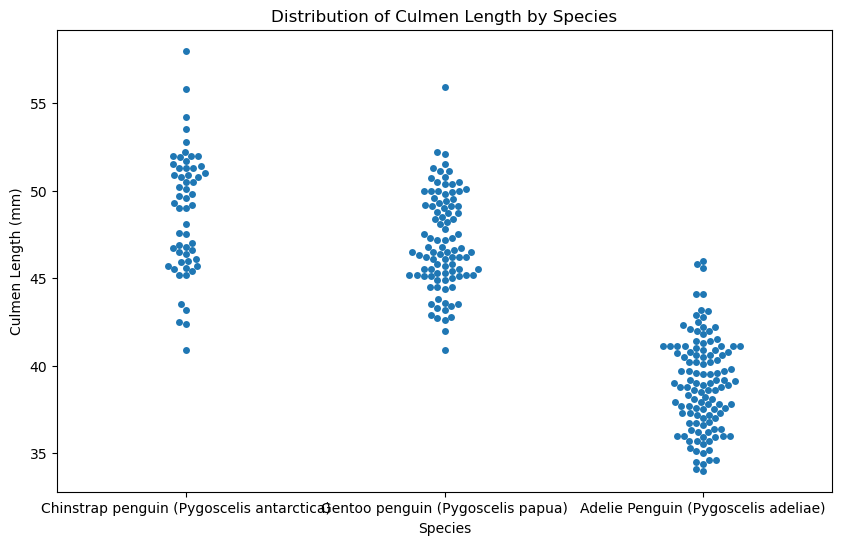

In [9]:
# Plot swarm plot
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Species', y='Culmen Length (mm)', data=train)
plt.title('Distribution of Culmen Length by Species')
plt.xlabel('Species')
plt.ylabel('Culmen Length (mm)')
plt.show()


Above is a swarmplot outlining the how individual data points are distributed across different categories. This plot shows the distribution of culmen length across different species. This graph can help visualize the density of data point and determine the frequency and provide context for data points like the mean or mode. 

In [10]:
summary_table = train.groupby('Species').agg({'Culmen Length (mm)': 'mean',
                                              'Culmen Depth (mm)': 'mean',
                                              'Flipper Length (mm)': 'mean',
                                              'Body Mass (g)': 'mean'}).reset_index()
summary_table


,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,Adelie Penguin (Pygoscelis adeliae),38.970588,18.409244,190.084034,3718.487395
1,Chinstrap penguin (Pygoscelis antarctica),48.826316,18.366667,196.000000,3743.421053
2,Gentoo penguin (Pygoscelis papua),47.073196,14.914433,216.752577,5039.948454


The summary table shows us mean of each category for each specie so we can easily compare quantitative data. This table can help us to compare specific features across different species of penguin.

In [11]:
#Multi-way classification, copied from assginment
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


#Data preparation 
X_train, y_train = prepare_data(train)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


# Feature selection
quantitative_features = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)'] 
qualitative_feature = ['Sex']

# Train and test models
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

# this counts as 3 features because the two Clutch Completion 
# columns are transformations of a single original measurement. 
# you should find a way to automatically select some better columnMu
# as suggested in the code block above
# cols = ["Flipper Length (mm)", "Body Mass (g)", "Clutch Completion_No", "Clutch Completion_Yes"]

  

Above we prepared the data preparing the data and then preforming a train_test spilt

In [12]:
#Test- train split 
from sklearn.model_selection import train_test_split


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC # support vector classifier
from mlxtend.plotting import plot_decision_regions # for visualization later


predictor_cols = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_col = "Species"


Above we chose our features that we are going to apply to the test data. For this model we want to correctly predict specie 100% of the time based on culmen length and depth.

In [14]:
LR = LogisticRegression()
LR.fit(X_train[predictor_cols], y_train)
LR.score(X_train[predictor_cols], y_train)
LR.coef_

array([[-0.87699872,  1.93957404],
       [ 0.2923175 ,  0.3240132 ],
       [ 0.58468122, -2.26358723]])

In [15]:
# Column combinations 
from itertools import combinations

# these are not actually all the columns: you'll 
# need to add any of the other ones you want to search for
all_qual_cols = ["Clutch Completion", "Sex"]
all_quant_cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)']

for qual in all_qual_cols: 
  qual_cols = [col for col in X_train.columns if qual in col ]
  for pair in combinations(all_quant_cols, 2):
    cols = qual_cols + list(pair) 
    print(cols)

['Clutch Completion_No', 'Clutch Completion_Yes', 'Culmen Length (mm)', 'Culmen Depth (mm)']
['Clutch Completion_No', 'Clutch Completion_Yes', 'Culmen Length (mm)', 'Flipper Length (mm)']
['Clutch Completion_No', 'Clutch Completion_Yes', 'Culmen Depth (mm)', 'Flipper Length (mm)']
['Sex_FEMALE', 'Sex_MALE', 'Culmen Length (mm)', 'Culmen Depth (mm)']
['Sex_FEMALE', 'Sex_MALE', 'Culmen Length (mm)', 'Flipper Length (mm)']
['Sex_FEMALE', 'Sex_MALE', 'Culmen Depth (mm)', 'Flipper Length (mm)']


Again, above demonstrates differnt combinations of features, even though we don't apply these to our test data. 

In [16]:
from statistics import mean


# LR.fit(X_test, y_test)
# LR.score(X_test, y_test)
preds = LR.predict(X_test[predictor_cols])
print(y_test == preds)


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


Above you can see that we were able to predict specie based on culmen length and depth with 100% accuracy!